# Using Sales Data Linear Rgression with Timeseries

Import the python libiraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load the dataset

i will be dropping of some columns just to make things simple for this lesson

In [40]:
df1= pd.read_csv("sales_train.csv", index_col = "date", parse_dates=['date']).drop(columns=["family", "id", "store_nbr", "onpromotion"],axis=1)

In [41]:
df1.head()

,sales
date,
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0
2013-01-01,0.0


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   sales   float64
dtypes: float64(1)
memory usage: 45.8 MB


In [54]:
# I will be using 50 samples from my data

df = df1.sample(100)


NOTE: because i am using a random data, the behaviour of the data may not be smooth as expected over time.
    
The aim is for you to understand the concept of time series

In [55]:
df.head()

,sales
date,
2015-09-29,0.0
2015-04-04,0.0
2013-06-19,15.0
2016-12-09,14.0
2014-01-16,3.0


#### Time steps

First let try using the time steps before we use time lags

Time-step features are features that we can generate directly based on the time index. The fundamental time-step feature is the time dummy, which tracks and counts the progression of time steps within the series from the initial point to the final point.

In [56]:
df["Time"] = np.arange(len(df.index))

In [57]:
df.head()

,sales,Time
date,,
2015-09-29,0.0,0
2015-04-04,0.0,1
2013-06-19,15.0,2
2016-12-09,14.0,3
2014-01-16,3.0,4


When employing linear regression with the time dummy, the resulting model can be expressed as:

Target = weight * time + bias

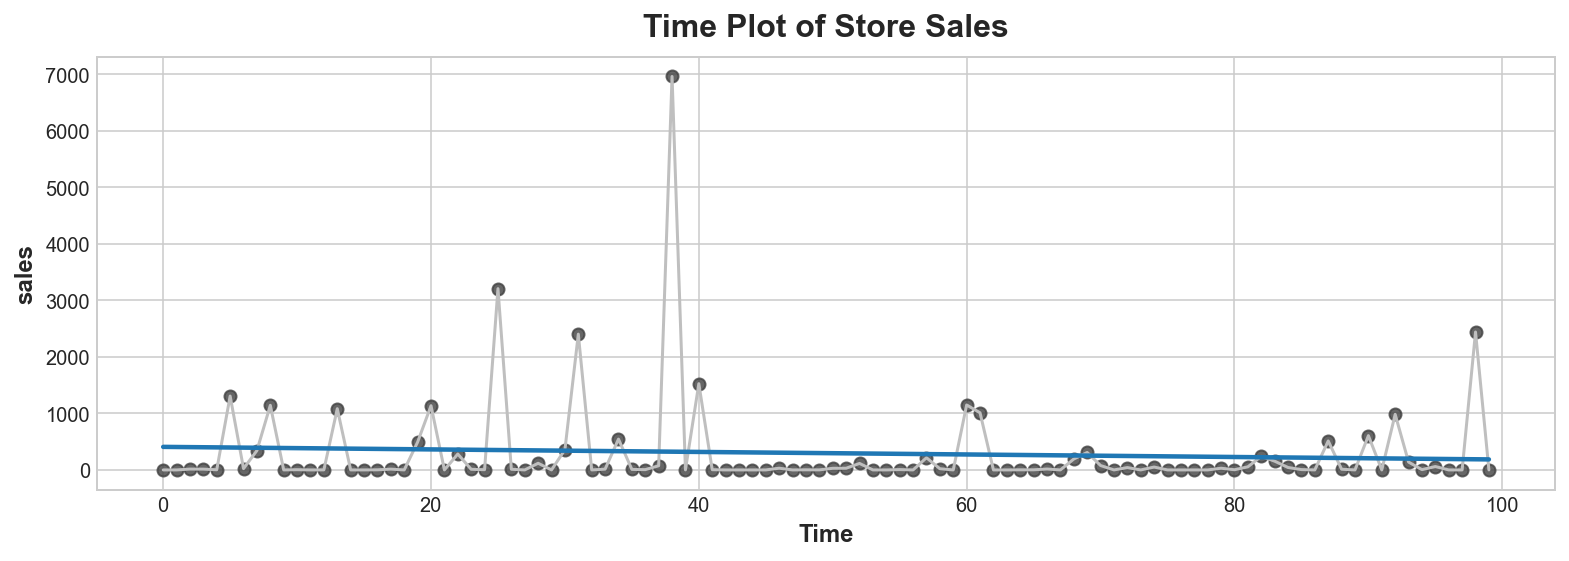

In [58]:
# This code is configuring the default settings for Matplotlib figures. 

plt.style.use("seaborn-whitegrid")

plt.rc(
    "figure",
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight="bold"

)

plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10

)

%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot("Time","sales",data=df, color="0.75" )
ax= sns.regplot(x="Time",y="sales",data=df, ci=None,scatter_kws=dict(color="0.25"))
ax.set_title('Time Plot of Store Sales');

In the store's sales series, it is foreseeable that sales towards the end of the month tend to be typically lower compared to sales at the beginning of the month.

### Lag features
To generate a lag feature, we move the data points of the target series forward in time, creating the illusion that they occurred at a later point. In this case, we've established a lag feature with a one-step shift, but it's also feasible to apply multiple-step shifts if needed.

In [60]:
df["lag_1"] =  df["sales"].shift(1)
df = df.reindex(columns=["sales", "lag_1"])

df.head()

,sales,lag_1
date,,
2015-09-29,0.0,NaN
2015-04-04,0.0,0.0
2013-06-19,15.0,0.0
2016-12-09,14.0,15.0
2014-01-16,3.0,14.0


When utilizing linear regression with a lag feature, we can formulate the model as follows:

Sales = Beta_0 + Beta_1Time

Lag features allow us to fit curves to lag plots, where each data point in a series is graphed against its preceding observation.

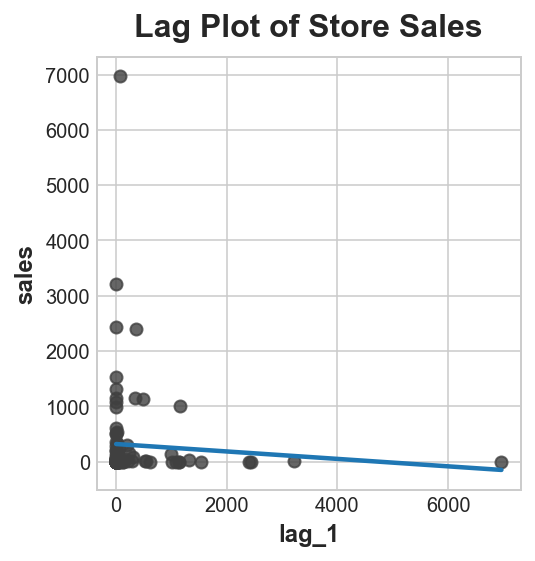

In [61]:
fig, ax = plt.subplots()
ax = sns.regplot(x="lag_1", y="sales", data=df, ci= None, scatter_kws=dict(color="0.25"))
ax.set_aspect("equal")
ax.set_title('Lag Plot of Store Sales');

By examining the lag plot, it becomes evident that there exists a correlation between sales on a particular day (Hardcover) and sales from the preceding day (Lag_1). Such an observed relationship signifies the utility of incorporating a lag feature.

In a broader context, lag features enable the modeling of serial dependence. A time series displays serial dependence when the prediction of an observation can be based on prior observations. In the case of Hardcover Sales, we can anticipate that elevated sales on one day often correspond to high sales on the subsequent day.

## For Traffic tunnel example

In [10]:
from warnings import simplefilter
simplefilter("ignore")  # ignore warnings to clean up output cell

In [11]:
df2 = pd.read_csv("tunnel.csv", index_col="Day",parse_dates=["Day"])
df2.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [12]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


## Time Feature

In [13]:
# Provided the time series doesn't have any missing dates, we can create a time dummy by counting out the length of the series.

df2["Time"] = np.arange(len(df2.index))

df2.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


The procedure for fitting a linear regression model follows the standard steps for scikit-learn.

### Train data

In [ ]:
X = df2.loc[:, ['Time']] 
Y = df2.loc[:, 'NumVehicles']

# OR

## Reshaping the data as a result of single fueature

# x = df2["Time"].values.reshape(1,-1)
# y = df2["NumVehicles"].values.reshape(1,-1)

model = LinearRegression()
model.fit(X,Y)

In [ ]:
print(X.shape)  # This will print the shape of X (number of samples, number of features)
print(model.coef_.shape)

In [ ]:
# training data

pred = model.predict(X)

#  Storing the predict values as a time series with the same time index

y_pred = pd.Series(model.predict(X), index=X.index)


In [ ]:
ax = Y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title(" Time plot of sales")

In [ ]:

coef =  model.coef_
coef

### Lag Feature

In [16]:
# using the shift method

df2["Lag_1"] = df2['NumVehicles'].shift(1)

df2.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [19]:
# drop the missing values

df3 = df2.copy()




In [20]:
df3.dropna(inplace= True)

In [21]:
df3.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0
2003-11-06,106284,5,106569.0


In [24]:
x = df3.loc[: , ["Lag_1"]]
y = df3.loc[:, "NumVehicles"]

model4 = LinearRegression()
model4.fit(x,y)

LinearRegression()

In [25]:
y_predi = model4.predict(x)



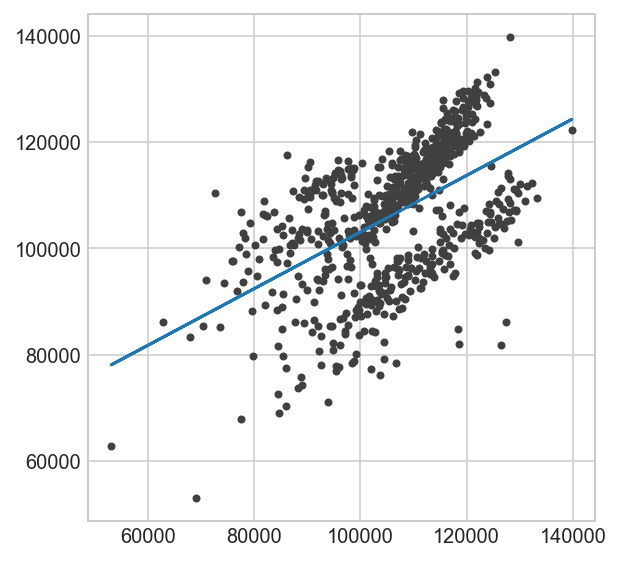

In [26]:
fig, ay = plt.subplots()
ay.plot(x["Lag_1"], y, ".", color="0.25")
ay.plot(x["Lag_1"], y_predi)
ay.set_aspect("equal")

The lag plot shows us how well we were able to fit the relationship between the number of vehicles one day and the number the previous day.

What does this prediction from a lag feature mean about how well we can predict the series across time? The following time plot shows us how our forecasts now respond to the behavior of the series in the recent past.



AttributeError: 'numpy.ndarray' object has no attribute 'plot'

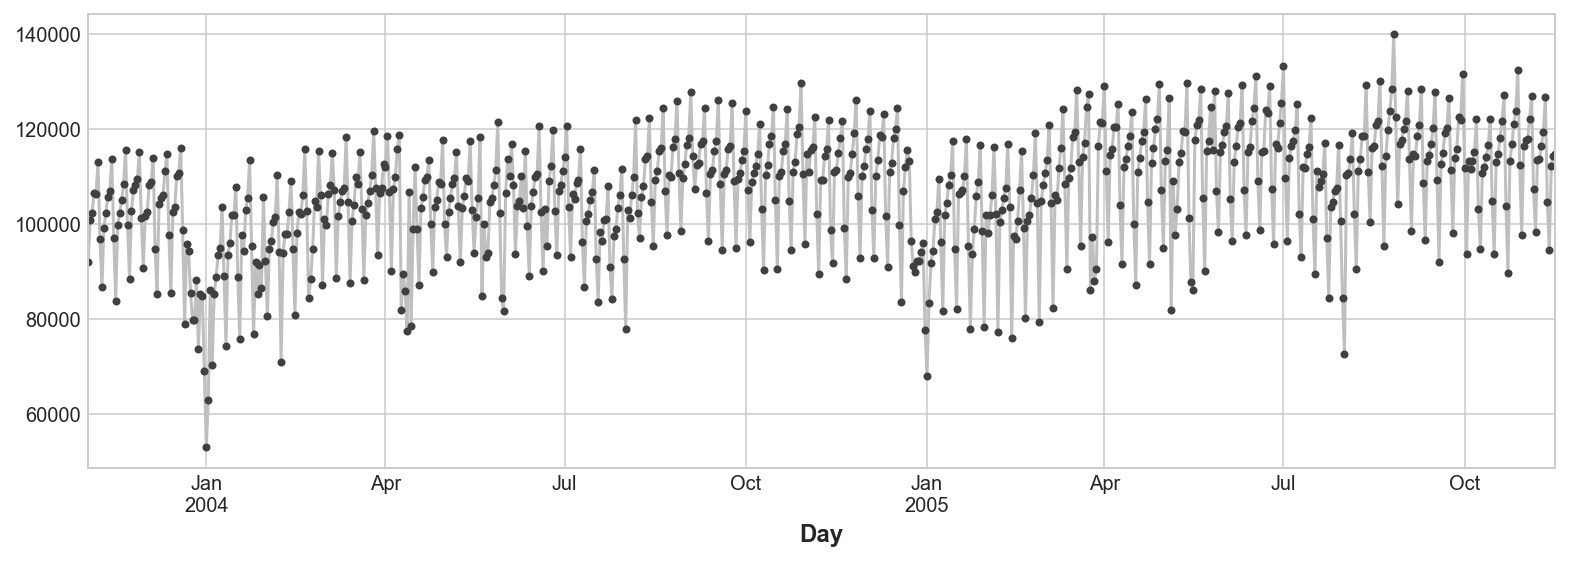

In [29]:
ay=y.plot(**plot_params)
ay= y_predi.plot()